In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('C:\\Users\\ASUS\\Desktop\\python case studies\\11. Capstone Case Study - Predict Cred Card Consumption')

In [3]:
creditConsumption = pd.read_excel('CreditConsumptionData.xlsx')

In [4]:
customerBehavior = pd.read_excel('CustomerBehaviorData.xlsx')

In [5]:
customer = pd.read_excel('CustomerDemographics.xlsx')

In [6]:
## Understanding The Data

In [7]:
creditConsumption.head(3)

,ID,cc_cons
0,17051,16239.0
1,11491,39002.0
2,7433,21182.0


In [8]:
creditConsumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       20000 non-null  int64  
 1   cc_cons  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB


In [9]:
customerBehavior.head(3)

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,2017.46,29066.66,15919.84,2197.00,3752.000,29798.00,1.0,4,35,...,47,20,41860.0,32734.75,80959.00,36,9,171200.0,Y,3448.84
1,11491,7687.00,1308.00,41888.92,2216.92,7060.530,3143.36,2.0,27,50,...,0,8,113367.0,60974.75,495080.00,5,3,15694.0,Y,3812.69
2,7433,9094.46,14825.95,3087.64,769.59,25602.595,1445.00,44.0,8,47,...,2,14,168000.0,425802.96,115707.38,7,58,28058.0,Y,9432.90


In [10]:
customer.head(3)

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,current,M,30,MEDIUM,26.4,9,9,355,0
1,11491,current,M,37,LOW,14.4,7,7,485,0
2,7433,current,M,33,MEDIUM,3.2,1,1,764,0


In [11]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  20000 non-null  object 
 2   gender                        20000 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        20000 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   20000 non-null  int64  
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  20000 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 1.5+ MB


In [12]:
customerBehavior.columns

Index(['ID', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'emi_active'],
      dtype='object')

In [14]:
customerBehavior[['card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may']].head(3)

,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may
0,345000,1,1,1.0,1,115818.74,158000.0,550.0,4795.0,33855.84,33401.0,70.0,36,135149.22,14282.00
1,369000,1,1,1.0,1,137553.95,187788.1,4699.0,-5439.0,32960.00,32339.0,11.0,4,44368.00,21935.71
2,27000,1,1,1.0,1,55700.00,165970.9,25508.0,6885.0,115190.10,42200.0,62.0,3,19360.00,56317.68


In [15]:
customerBehavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            19999 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

## Checking For Null Values

In [16]:
print("Missing Values in Credit Consumption:\n", creditConsumption.isnull().sum(), "\n")
print("Missing Values in Customer Behavior:\n", customerBehavior.isnull().sum(), "\n")
print("Missing Values in Customer Demographics:\n", customer.isnull().sum(), "\n")

Missing Values in Credit Consumption:
 ID            0
cc_cons    5000
dtype: int64 

Missing Values in Customer Behavior:
 ID                       0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              1
dc_cons_may              1
cc_cons_jun              0
dc_cons_jun              1
cc_count_apr             1
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     1
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             2
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          1
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount

In [17]:
customerBehavior.dropna(inplace=True)

## Preparing The Dataset

In [18]:
merged_df = customerBehavior.merge(customer,on='ID',how='inner')

In [19]:
merged_df = merged_df.merge(creditConsumption,on='ID',how='inner')

In [21]:
merged_df.head(3)

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons
0,17051,2017.46,29066.66,15919.84,2197.00,3752.000,29798.00,1.0,4,35,...,current,M,30,MEDIUM,26.4,9,9,355,0,16239.0
1,11491,7687.00,1308.00,41888.92,2216.92,7060.530,3143.36,2.0,27,50,...,current,M,37,LOW,14.4,7,7,485,0,39002.0
2,7433,9094.46,14825.95,3087.64,769.59,25602.595,1445.00,44.0,8,47,...,current,M,33,MEDIUM,3.2,1,1,764,0,21182.0


In [22]:
merged_df.shape

(19991, 49)

In [23]:
test_df = merged_df[merged_df['cc_cons'].isnull()]
test_df.reset_index(drop=True,inplace=True)

In [24]:
test_df.to_csv('test_file.csv',index=False)

In [25]:
merged_df = merged_df[~merged_df['cc_cons'].isnull()]

In [26]:
merged_df.shape,test_df.shape

((14993, 49), (4998, 49))

## Exploratory Data Analysis

In [27]:
merged_df.describe()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,debit_count_jun,max_credit_amount_jun,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons
count,14993.000000,14993.000000,14993.000000,1.499300e+04,14993.000000,14993.000000,14993.000000,14993.000000,14993.00000,14993.000000,...,14993.000000,1.499300e+04,1.499300e+04,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,10032.206230,17961.834649,8168.237205,1.633949e+04,7704.676979,12129.386670,7099.351901,41.500700,33.48516,41.506103,...,44.647969,5.257668e+04,1.575568e+04,47.766624,15.185073,5.510438,5.510438,598.397385,0.719602,9369.569257
std,5761.048272,25192.717712,14769.893627,2.706671e+04,18991.347323,18491.427033,13254.450825,97.453103,49.54702,47.350281,...,35.088853,1.282776e+05,1.179405e+05,30.573014,20.316444,2.866058,2.866058,220.085924,0.449208,7554.028948
min,1.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.00000,1.000000,...,0.000000,6.000000e-02,0.000000e+00,25.000000,0.500000,1.000000,1.000000,123.000000,0.000000,610.099000
25%,5059.000000,4411.220000,1634.000000,3.638000e+03,1643.500000,3004.500000,1358.000000,5.000000,8.00000,10.000000,...,12.000000,1.903800e+04,1.548510e+03,33.000000,5.100000,3.000000,3.000000,424.000000,0.000000,4808.670000
50%,10053.000000,10288.100000,3994.800000,8.690170e+03,3820.000000,6655.250000,3327.000000,10.000000,23.00000,35.000000,...,38.000000,3.042500e+04,3.953580e+03,40.000000,9.900000,6.000000,6.000000,623.000000,1.000000,7409.948800
75%,15016.000000,21410.250000,9339.020000,1.895130e+04,8212.000000,14247.000000,7597.000000,44.000000,43.00000,61.000000,...,73.000000,5.320200e+04,9.372410e+03,53.000000,18.000000,8.000000,8.000000,799.000000,1.000000,11518.657600
max,19998.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,601.00000,653.000000,...,133.000000,5.200000e+06,7.447125e+06,223.000000,203.000000,10.000000,10.000000,974.000000,1.000000,160735.934800


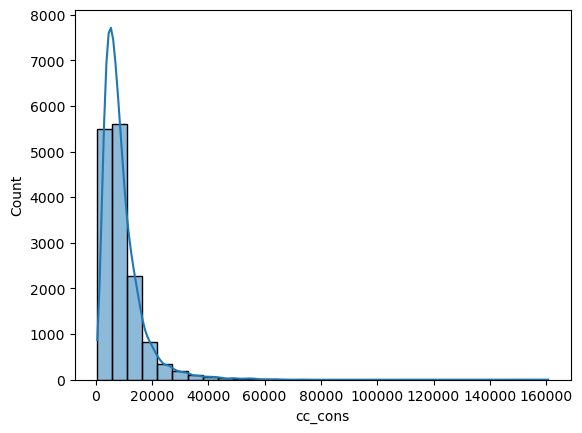

In [28]:
sns.histplot(merged_df['cc_cons'],bins=30,kde=True)
plt.show()

## Correlation Check

In [29]:
corr_mat = merged_df.select_dtypes('number').corr()

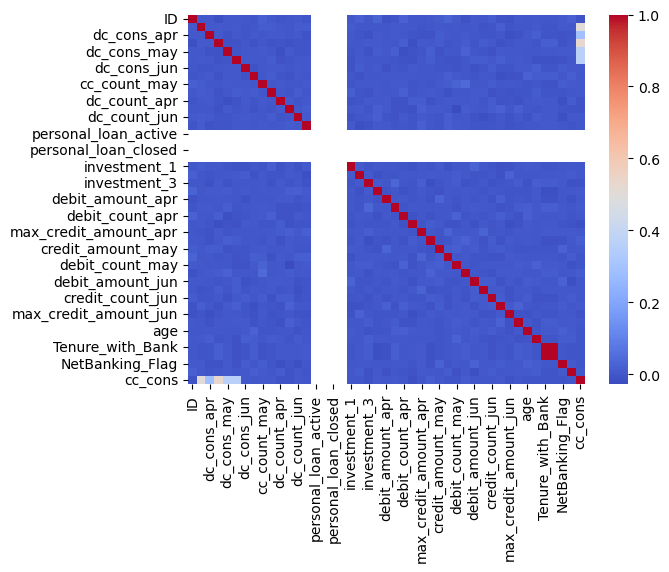

In [30]:
sns.heatmap(corr_mat,cmap='coolwarm')
plt.show()

## Handling Categorical Variables

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
for col in ['loan_enq', 'account_type', 'gender', 'Income']:
    merged_df[col] = merged_df[col].astype('str')

In [33]:
cat_col = ['loan_enq', 'account_type', 'gender', 'Income']
mapping_dict = {}
for col in cat_col:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col])
    temp_dict = dict(zip(le.classes_,sorted(merged_df[col].unique())))
    mapping_dict.update(temp_dict)
print(mapping_dict)

{'Y': 0, 'current': 0, 'saving': 1, 'F': 0, 'M': 1, 'HIGH': 0, 'LOW': 1, 'MEDIUM': 2}


In [34]:
encode_df = pd.DataFrame(mapping_dict.items(),columns=['id','value']) 

In [35]:
encode_df.to_csv('mapping_dict_capstoneproject.csv',index=False)

## Standardization

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
merged_df.columns

Index(['ID', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'emi_active',
       'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons'],
      dtype='object')

In [38]:
x = merged_df.iloc[:,:-1]
y = merged_df.iloc[:,-1]

In [39]:
ss = StandardScaler()
x_ft = ss.fit_transform(x)
x_ft = pd.DataFrame(x_ft)
x_ft.head(3)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1.218359,-0.632917,1.414981,-0.015505,-0.290019,-0.453057,1.712587,-0.415606,-0.595114,-0.137408,...,-0.104351,-0.422723,0.39854,-0.581141,0.689085,0.552031,1.217588,1.217588,-1.105957,-1.601988
1,0.253225,-0.407863,-0.464490,0.943974,-0.288971,-0.274128,-0.298475,-0.405344,-0.130893,0.179390,...,-0.101266,-0.422723,0.39854,-0.352173,-0.879853,-0.038644,0.519742,0.519742,-0.515259,-1.601988
2,-0.451184,-0.351993,0.450777,-0.489616,-0.365183,0.728643,-0.426614,0.025647,-0.514380,0.116031,...,-0.053612,-0.422723,0.39854,-0.483011,0.689085,-0.589939,-1.573795,-1.573795,0.752470,-1.601988


In [40]:
import pickle
with open('./standard_scaler.pkl','wb') as file:
    pickle.dump(ss,file)

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(x_ft,y,test_size=0.2,random_state=64)

In [43]:
xtrain.shape,xtest.shape

((11994, 48), (2999, 48))

## Model Selection

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [46]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
pred = lr.predict(xtest)

In [69]:
def get_rms_percentage_error(pred,ytest):
    mse = mean_squared_error(pred,ytest)
    rmse = np.sqrt(mse)
    rms_percentage_error = (rmse/np.mean(ytest))*100
    print(' RMSE :',rmse,'\n','rms_percentage_error :',rms_percentage_error)

In [52]:
get_rms_percentage_error(pred,ytest)

 RMSE : 2546.4333625447803 
 rms_percentage_error : 27.75524134829302


In [53]:
train_pred = lr.predict(xtrain)
get_rms_percentage_error(train_pred,ytrain)

 RMSE : 2717.091699151083 
 rms_percentage_error : 28.849009625517635


In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)
dtr_pred = dtr.predict(xtest)
get_rms_percentage_error(dtr_pred,ytest)

 RMSE : 4078.90093123209 
 rms_percentage_error : 44.45860686846579


In [58]:
dtr_train_pred = dtr.predict(xtrain)
get_rms_percentage_error(dtr_train_pred,ytrain)

 RMSE : 0.0 
 rms_percentage_error : 0.0


In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
params = {
    'max_depth':[2,3,4,5],
    'min_samples_split':[20,30,40,50]
}

In [61]:
dt1 = DecisionTreeRegressor()
gc = GridSearchCV(dt1,params)
gc.fit(xtrain,ytrain)
dt1_pred = gc.predict(xtest)
get_rms_percentage_error(dt1_pred,ytest)

 RMSE : 4772.405780471168 
 rms_percentage_error : 52.017569435468246


In [62]:
dt1_train_pred = gc.predict(xtrain)
get_rms_percentage_error(dt1_train_pred,ytrain)

 RMSE : 4478.309219543143 
 rms_percentage_error : 47.54892366018033


In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rgb = RandomForestRegressor()
rgb.fit(xtrain,ytrain)
rgb_pred = rgb.predict(xtest)
get_rms_percentage_error(rgb_pred,ytest)

 RMSE : 3064.8175788083645 
 rms_percentage_error : 33.40544969270576


In [65]:
rgb_train_pred = rgb.predict(xtrain)
get_rms_percentage_error(rgb_train_pred,ytrain)

 RMSE : 1232.5998358082934 
 rms_percentage_error : 13.087259638220864


In [66]:
from sklearn.ensemble import GradientBoostingRegressor

In [67]:
gb = GradientBoostingRegressor()
gb.fit(xtrain,ytrain)
gb_pred = gb.predict(xtest)
get_rms_percentage_error(gb_pred,ytest)

 RMSE : 2879.882749952569 
 rms_percentage_error : 31.389724135501986


In [68]:
gb_train_pred = gb.predict(xtrain)
get_rms_percentage_error(gb_train_pred,ytrain)

 RMSE : 2420.3251453117996 
 rms_percentage_error : 25.698059228475064


#### Best model working for our data is Linear Regression Model

In [70]:
with open('./best_model.pkl','wb') as file:
    pickle.dump(lr,file)